In [1]:
import pk_plot_library as pplib
import pickle as pkl

pplib.imports()

In [4]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/11-20_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 12)
ds.legendArgs(frameon = False, fontsize = 12, slc = (-1, -1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift'])
ds.setOrder('snapshot', [99, 67, 50])
ds.setXLabel(pplib.wnum())
ds.setYLabel(pplib.pklab('HI'))


fieldnames = ['vn', 'hiptl', 'hisubhalo']
ds.setColors('HI_fieldname', ['firebrick', 'saddlebrown', 'sandybrown'], fieldnames)
ds.displayAs('HI_fieldname', fieldnames, ['All Particles', 'Particles in Galaxies', 'Galaxy Centers'])

# make plots displaying different snapshots in the same panel use a colormap
snapshots = ds.getAttrVals('snapshot')
snapshots.sort()
snapshots.reverse()
ds.setColors('snapshot', 'viridis', snapshots)
ds.displayAs('snapshot', snapshots, ['z = 0.0', 'z = 0.5', 'z = 1.0', 'z = 2.0'])

ds.displayAs('space', ['real', 'redshift'], ['Real Space', 'Redshift Space'])
print(snapshots)

[99, 67, 50, 33]


# Investigations

## Comparing HI models across redshifts

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67, 50]


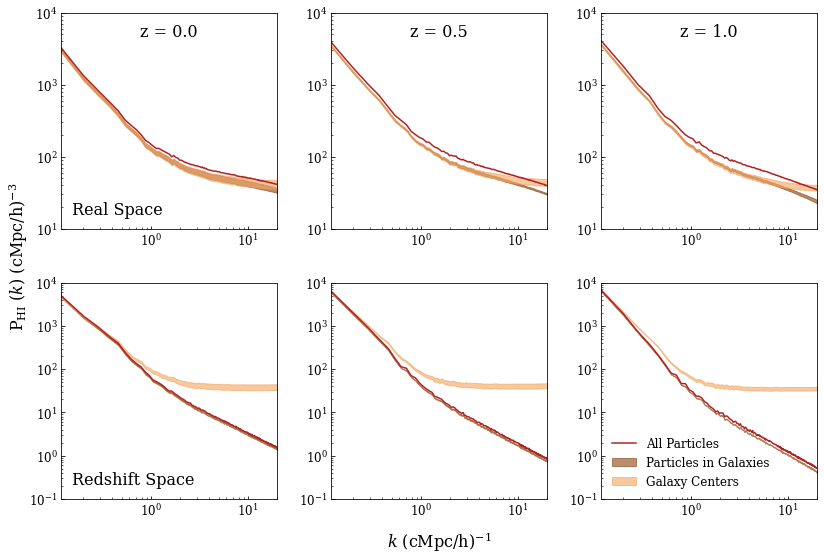

In [17]:
ip = {'is_auto':True, 'path':'fiducial','simname':'tng100', 'snapshot':snapshots, 'space':['real', 'redshift'],
     'snapshot' : [99, 67, 50], 'fieldname':['hiptl', 'hisubhalo', 'vn']}
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = [10, 1e4], slc = 'real')
fg.axisArgs(ylim = [0.1, 1e4], slc = 'redshift')
fg.legendArgs(loc = 'lower left')
fg.plot()

* Differences between Paco and Benedikt decrease very slightly with time - possibly because of slight increase in fraction of HI within galaxies?

* z = 0 -> z = 1, differences between individual D18 models grows, then shrinks again -> z= 2. <span style="color:red;"> Is this due to the cosmic HI abundance in TNG? </span>

* As we go back in time, the scale at which the "particles within galaxies" and "galaxy centers" diverge grows - this is in comoving coordinates

* RSDs get stronger with redshift, but otherwise are not as interesting. More infalling matter at z = 2?

## Comparing Redshifts in the same Panel

The row values for space: ['real', 'redshift']
The column values for fieldname: ['vn', 'hiptl', 'hisubhalo', 'ptl']


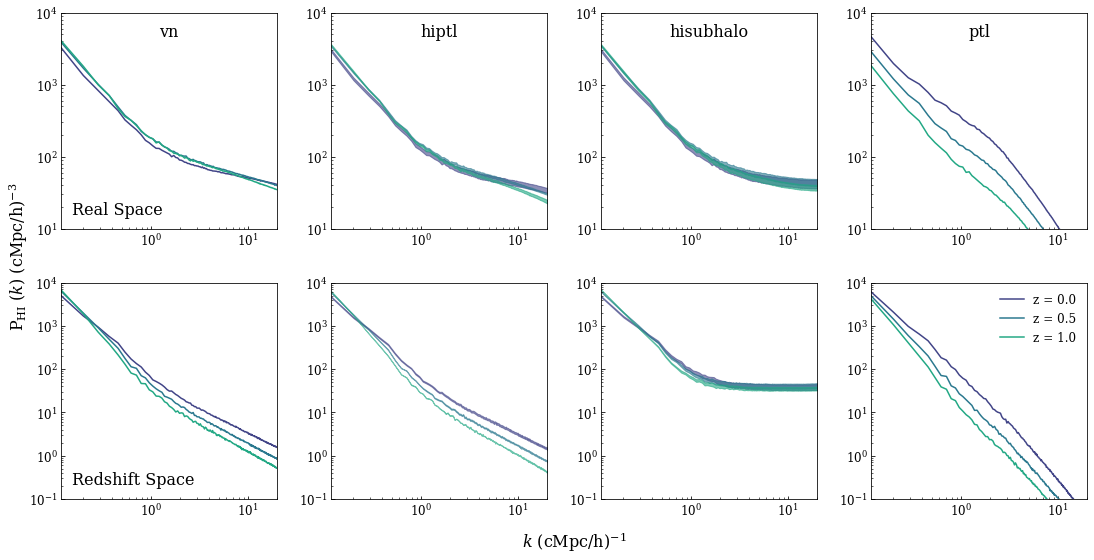

In [18]:
ip['fieldname'] = ['vn', 'hiptl', 'hisubhalo', 'ptl']
ip['space'] = ['real', 'redshift']
ip['snapshot'] = [50, 67, 99]
ip['ptl_species'] = ['ptl', 'no key found']
fg = ds.figrid('snapshot', 'space', 'fieldname', ip)
fg.autoFill(alpha = 0.6)
fg.axisArgs(ylim = [10, 1e4], slc = 'real')
fg.axisArgs(ylim = [0.1, 1e4], slc = 'redshift')
fg.legendArgs(slc = (-1, -1))
fg.plot()
# ip['fieldname'] = 'ptl'
# ds.printMatching(ip)

Why are we getting the inverse redshift evolution again from z = 0 -> z = 0.5 for HI in real space?

# Paper Figures

## HI Auto

The row values for space: ['real', 'redshift']
The column values for snapshot: [99]


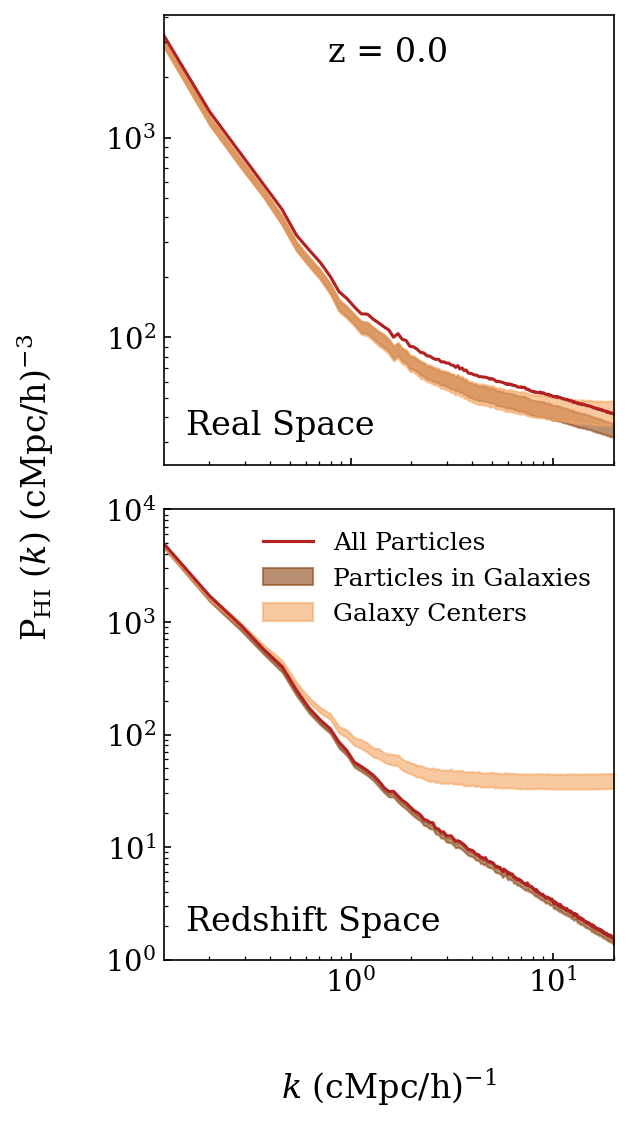

In [5]:
ip = {'is_auto':True, 'is_atomic':True, 'path':'fiducial', 'snapshot':99, 'space':['real', 'redshift'], 'simname':'tng100'}
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip)
fg.autoFill(alpha = 0.6)
fg.gspecArgs(hspace = 0.1)
fg.figArgs(dpi = 150)
fg.setDefaultTicksParams()
fg.tickArgs(labelsize = 14)
fg.legendArgs(fontsize = 12, slc = (1,0))
fg.axisArgs(ylim = (1, 1e4), slc = ['redshift'])
fg.plot()
fg.save("HIauto99.png")
fg.save("/Users/cosinga/code/hicolor_draft/figures/HIauto99.pdf")


# Presentation Figures

## HI Auto

The row values for space: ['real']
The column values for snapshot: [99]


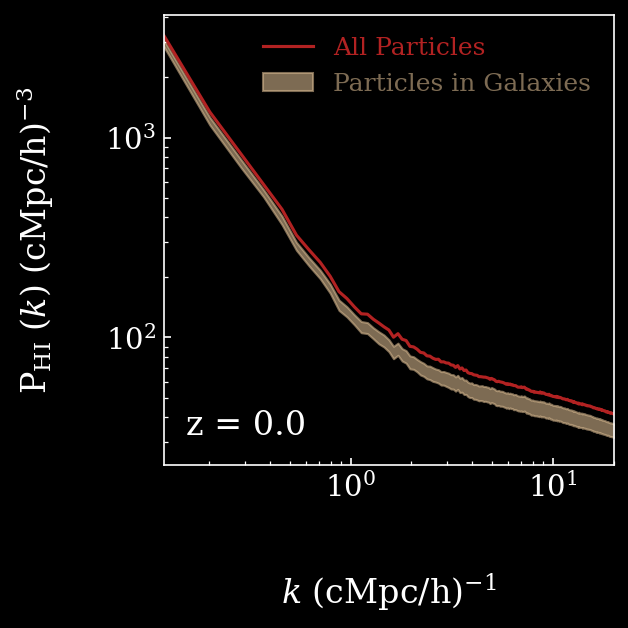

In [6]:
ip = {'is_auto':True, 'is_atomic':True, 'path':'fiducial', 'snapshot':99, 'space':'real', 
      'simname':'tng100', 'HI_fieldname':['vn', 'hiptl']}
fg = ds.figrid('HI_fieldname', 'space', 'snapshot', ip)
fg.autoFill()
fg.axisLabelArgs('both', color = 'white')
fg.colLabelArgs(color = 'white', ha = 'left', va = 'bottom')
fg.colLabels(pos = [0.05, 0.05])
fg.rowLabels([''])
# fg.rowLabelArgs(color = 'white')
fg.spineArgs(edgecolor = 'white')
fg.gspecArgs(hspace = 0.1)
fg.figArgs(dpi = 150, facecolor = 'black')
fg.axisArgs(facecolor = 'black')
fg.plotArgs('hiptl', color = 'tan')

fg.setDefaultTicksParams()
fg.tickArgs(labelsize = 14, color = 'white', labelcolor = 'white')
fg.legendArgs(fontsize = 12, slc = (0,0), labelcolor = 'linecolor')
fg.axisArgs(ylim = (1, 1e4), slc = ['redshift'])
fg.plot()
# fg.save("HIauto_99_tng100_hiptl+vn_pres.png")


The row values for space: ['real']
The column values for snapshot: [99]


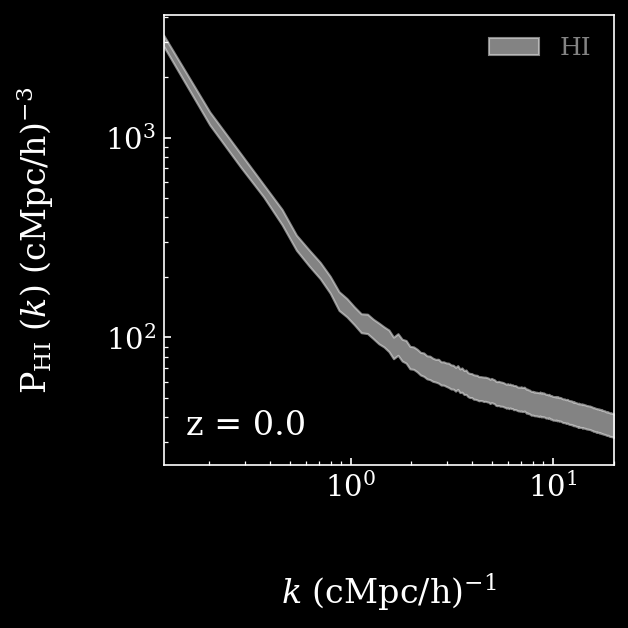

In [7]:
ip = {'is_auto':True, 'is_atomic':True, 'path':'fiducial', 'snapshot':99, 'space':'real', 
      'simname':'tng100', 'HI_fieldname':['vn', 'hiptl']}
fg = ds.figrid('simname', 'space', 'snapshot', ip)
fg.autoFill(color = 'gainsboro', label = 'HI')
fg.axisLabelArgs('both', color = 'white')
fg.colLabelArgs(color = 'white', ha = 'left', va = 'bottom')
fg.colLabels(pos = [0.05, 0.05])
fg.rowLabels([''])
# fg.rowLabelArgs(color = 'white')
fg.spineArgs(edgecolor = 'white')
fg.gspecArgs(hspace = 0.1)
fg.figArgs(dpi = 150, facecolor = 'black')
fg.axisArgs(facecolor = 'black')
fg.plotArgs('tng100', )

fg.setDefaultTicksParams()
fg.tickArgs(labelsize = 14, color = 'white', labelcolor = 'white')
fg.legendArgs(fontsize = 12, slc = (0,0), labelcolor = 'linecolor')
fg.axisArgs(ylim = (1, 1e4), slc = ['redshift'])
fg.plot()
# fg.save("HIauto_99_tng100_hiptl+vn_pres.png")
